Homework 4 MG

In [15]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
community_dataset = pd.read_csv('community_dataset.csv')

In [ ]:
community_dataset.head()

Задача 1

 Есть ли стат-значимость между типом клетки и:

б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.

в) Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.

В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

In [ ]:
community_dataset[['cell_type', 'area_of_cell']]

In [ ]:
order = community_dataset['age_group'].unique()
order

In [29]:
pairs = list(combinations(order, 2))
pairs

[('elder_group', 'young_group')]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.017e-01 U_stat=5.942e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.789e-03 U_stat=4.619e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:5.130e-04 U_stat=3.348e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
 

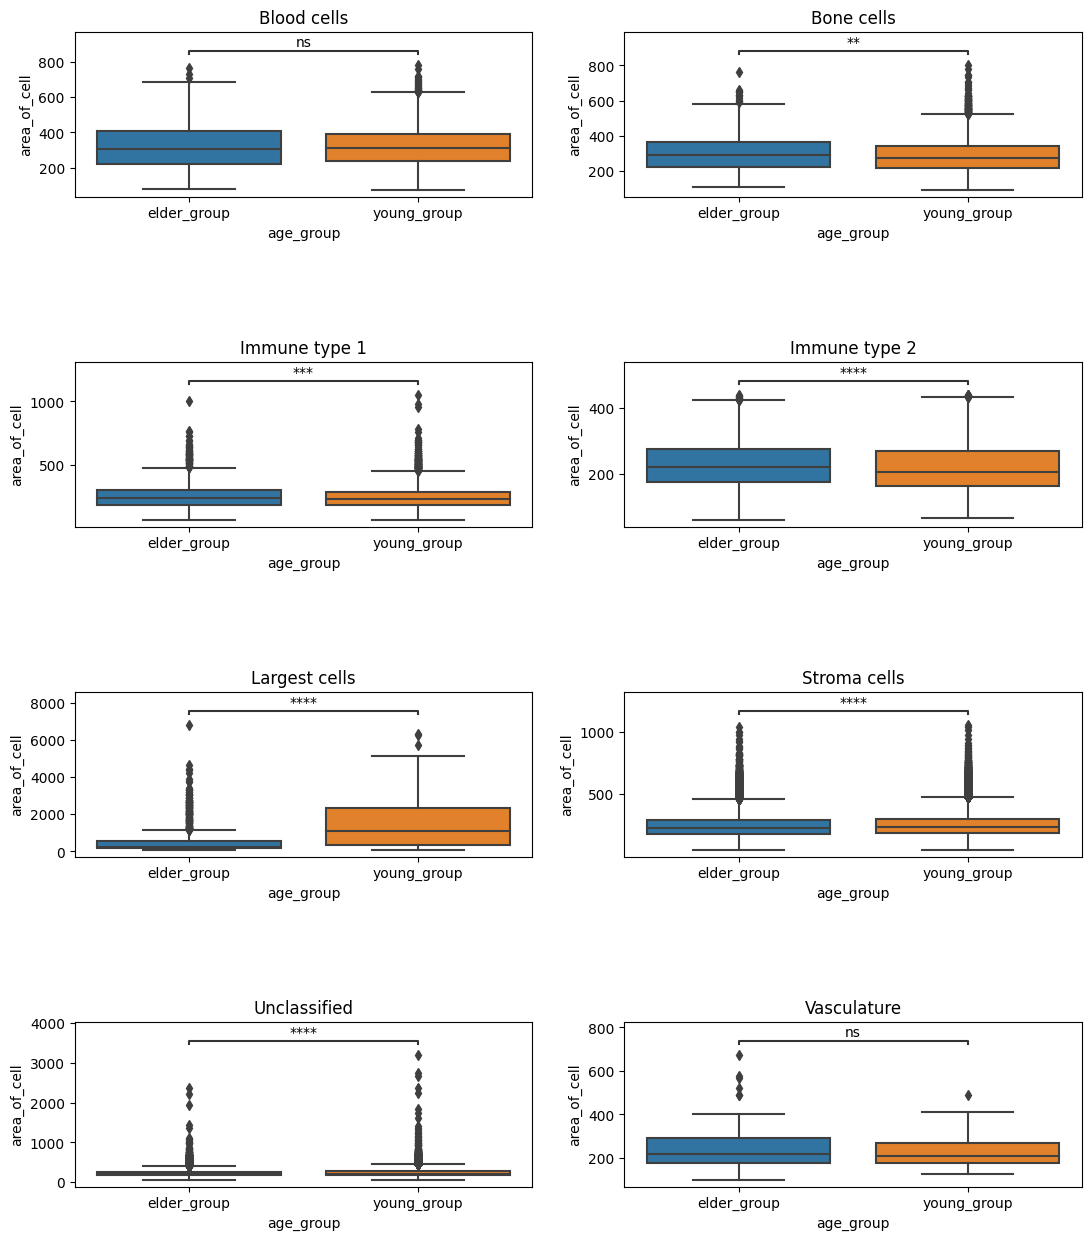

In [45]:
grouped = community_dataset.groupby(by='cell_type')[['area_of_cell', 'age_group']]

n_groups = community_dataset['cell_type'].nunique()

fig, ax = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(13,15)
plt.subplots_adjust(hspace=1)

for index, (key, group) in enumerate(grouped):
      sns.boxplot(x=group['age_group'], y=group['area_of_cell'], ax=ax[index//2, index%2], order=order)
      ax[index//2, index%2].set_title(key, loc='center')
      
      annotator = Annotator(ax[index//2, index%2], 
                            pairs, 
                            data=group, 
                            x='age_group', 
                            y="area_of_cell", 
                            order=order)
      annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
      annotator.apply_and_annotate()
   

во всех клетках кроме blood_cell и vascularize, 

площадь клетки (area_of_cell) у молодых и возврастных пациентов значимо отличается

In [25]:
from statannotations.Annotator import Annotator
from itertools import combinations

In [ ]:
order = community_dataset['age_group'].unique()